In [1]:
import random
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataDir='/hdd/manoj/VQA'
taskType='OpenEnded'
dataType='mscoco' # 'mscoco' for real and 'abstract_v002' for abstract
dataSubType='val2014'  #test2015 test2015 val2014
annFile='%s/Annotations/%s_%s_annotations.json'%(dataDir, dataType, dataSubType)
quesFile='%s/Questions/%s_%s_%s_questions.json'%(dataDir, taskType, dataType, dataSubType)
imgDir = '%s/Images/%s/%s/' %(dataDir, dataType, dataSubType)

In [3]:
from vqatools.vqa import VQA
vqa = VQA(annFile,quesFile)
vqa.info()

Loading VQA annotations and questions in memory...
Creating index ..
Index created ..
=======  mscoco / val2014  ======= 
{'description': 'This is v2.0 of the VQA dataset.', 'url': 'http://visualqa.org', 'version': '2.0', 'year': 2017, 'contributor': 'VQA Team', 'date_created': '2017-04-26 17:00:44'}


In [4]:
vqa.questions['questions'][0]

{'image_id': 262148,
 'question': 'Where is he looking?',
 'question_id': 262148000}

In [5]:
len(vqa.answers['annotations'])

214354

In [6]:
vqa.answers['annotations'][0]

{'answer_type': 'other',
 'answers': [{'answer': 'down', 'answer_confidence': 'yes', 'answer_id': 1},
  {'answer': 'down', 'answer_confidence': 'yes', 'answer_id': 2},
  {'answer': 'at table', 'answer_confidence': 'yes', 'answer_id': 3},
  {'answer': 'skateboard', 'answer_confidence': 'yes', 'answer_id': 4},
  {'answer': 'down', 'answer_confidence': 'yes', 'answer_id': 5},
  {'answer': 'table', 'answer_confidence': 'yes', 'answer_id': 6},
  {'answer': 'down', 'answer_confidence': 'yes', 'answer_id': 7},
  {'answer': 'down', 'answer_confidence': 'yes', 'answer_id': 8},
  {'answer': 'down', 'answer_confidence': 'yes', 'answer_id': 9},
  {'answer': 'down', 'answer_confidence': 'yes', 'answer_id': 10}],
 'image_id': 262148,
 'multiple_choice_answer': 'down',
 'question_id': 262148000,
 'question_type': 'none of the above'}

In [7]:
vqa.imgToQA[458752]

[]

In [8]:
# load and display QA annotations for given question types
"""
All possible quesTypes for abstract and mscoco has been provided in respective text files in 
../QuestionTypes/ folder.
"""
qids = vqa.getQuesIds(quesType='how many')
print("There are %d questions of these types" %(len(qids)))

There are 20462 questions of these types


Question: How many bicycles are pictured?
Answer 1: 2
Answer 2: 1
Answer 3: 2
Answer 4: 2
Answer 5: 2
Answer 6: 2
Answer 7: 2
Answer 8: 2
Answer 9: 2
Answer 10: 1
[[[  Final Answer:  2  ]]]
COCO_val2014_000000076648.jpg


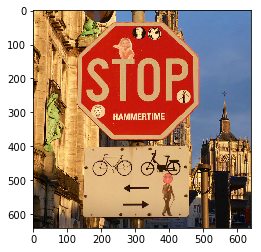

In [15]:
randomqid = random.choice(qids)
imgid = vqa.showQA(randomqid)
from collections import Counter
answers = []
for ans in vqa.qa[randomqid].get('answers'):
    answers.append(ans['answer'])
final_answer = Counter(answers).most_common()[0][0]
print ("[[[  Final Answer: ",final_answer," ]]]")
showimg=True
if showimg:
    imgFilename = 'COCO_' + dataSubType + '_'+ str(imgid).zfill(12) + '.jpg'
    print (imgFilename)
    if os.path.isfile(imgDir + imgFilename):
        I = Image.open(imgDir + imgFilename)
        plt.imshow(np.asarray(I))
        

In [10]:
#PRODUCE FAKE TEST-DEV / TEST JSON FILE FOR SUBMISSION
import json
JSON_DIR ='/hdd/manoj/VQA/Questions/'
JSON_FILE = 'OpenEnded_mscoco_test-dev2015_questions.json'    
with open(os.path.join(JSON_DIR,JSON_FILE)) as data_file:  
    data = json.load(data_file)
print  ("total no of questions:",len(data['questions']))
print (data['questions'][0])
results = []
for i in range(len(data['questions'])):    
    result = {}
    result["question_id"] =  data['questions'][i]['question_id']
    result["answer"] =  "1"
    results.append(result)
    
with  open("myfakedevetest.json",'w') as fp:
    json.dump(results, fp)

total no of questions: 107394
{'image_id': 262144, 'question': 'What credit card company is on the banner in the background?', 'question_id': 262144005}
